In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [1]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = "../multi_parameter/overhead_model_multi_parameter.nc"
variable_list = ['g_mp']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "overhead_interactions_multi_transformed"



transformations = {
    #'a_m': log_to_exp,
    #'b_p': log_to_exp,
    'g_mp': log_to_exp

}

table_location = f"tables/{file_name}.csv"
image_location = f"posterior_distributions/{file_name}.pdf"


### Generate Summary object

In [2]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [3]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../multi_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'Coverage')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (16080, 24)
Parameter Matrix shape: (16080, 66)
Interaction Matrix shape: (16080, 1584)
Observation Matrix shape: (16080, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_mp[decorators x ChangeParamProb|StatemInsertProb],1.058,0.486,0.554,1.470,0.004,0.003,24816.0,15444.0,1.0
g_mp[timer x Pop|StatemInsertProb],1.059,0.537,0.537,1.444,0.004,0.003,23006.0,16647.0,1.0
g_mp[headers x Pop|TestInsertProb],1.059,0.527,0.558,1.503,0.004,0.003,23022.0,17317.0,1.0
g_mp[lazy_import x ChangeParamProb|TourSize],1.059,0.590,0.519,1.448,0.004,0.003,23469.0,16884.0,1.0
g_mp[immutable_list x ChromLen|TestInsertProb],1.060,0.498,0.530,1.445,0.004,0.003,24337.0,16861.0,1.0
...,...,...,...,...,...,...,...,...,...
g_mp[python x Pop|StatemInsertProb],1.222,19.124,0.528,1.449,0.135,0.096,23252.0,16763.0,1.0
g_mp[lazy_import x Elite|Pop],1.232,22.736,0.528,1.474,0.161,0.114,24921.0,17540.0,1.0
g_mp[h_base x Pop|RandPert],1.284,28.859,0.528,1.449,0.204,0.144,25002.0,16322.0,1.0
g_mp[namedtupleutils x ChangeParamProb|Crossover],1.975,125.811,0.539,1.472,0.889,0.629,25030.0,17298.0,1.0


### Save summary table as CSV

In [4]:
summary.to_csv(table_location, index=True)

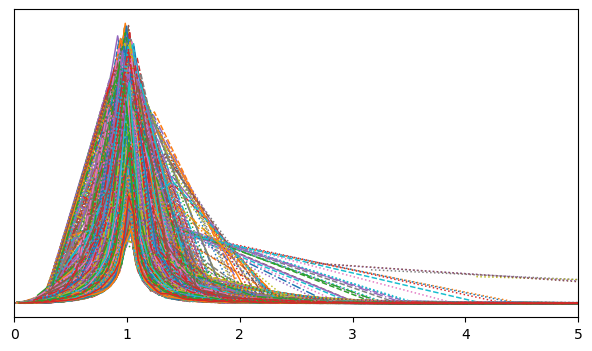

In [5]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)

#axes[0, 0].set_xlim([0, 5])


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()